# Corona Prediction Model

### Importing basic Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the csv File :

In [2]:
df = pd.read_csv('C:/Users/Saksham/Desktop/data/p_corona.csv', dtype = {'age_60_and_above' : str})
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


### Checking the Shape of Dataset :

In [3]:
df.shape

(2742596, 10)

### Checking the Datatypes of all features :

In [4]:
df.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

### Checking for NaN values :

In [5]:
df.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

### Dropping the NaN values : 

In [6]:
df.dropna(inplace = True)

### Checking distinct categories for each categorical feature :

In [7]:
df['gender'].value_counts()

female    1123893
male      1062334
Name: gender, dtype: int64

In [8]:
df['age_60_and_above'].value_counts()

No     1900157
Yes     286070
Name: age_60_and_above, dtype: int64

In [9]:
df['test_indication'].value_counts()

Other                     2018366
Contact with confirmed     151848
Abroad                      16013
Name: test_indication, dtype: int64

In [10]:
df['corona_result'].value_counts()

negative    1943172
positive     208726
other         34329
Name: corona_result, dtype: int64

### Removing the rows where corona_result is 'other' :

In [11]:
df = df[df.corona_result != 'other']

### Taking sample of Data :

In [12]:
df = df.sample(frac = 0.01, random_state = 2)

In [13]:
df.reset_index(drop = True, inplace = True)

In [14]:
df.shape

(21519, 10)

### Adding new feature 'contact_with_confirmed' :

In [15]:
df['contact_with_confirmed'] = (df['test_indication'] == 'Contact with confirmed')

### Adding new feature 'Abroad' :

In [16]:
df['Abroad'] = (df['test_indication'] == 'Abroad')

### Removing Irrelevant columns :

In [17]:
df.drop(columns = ['test_date', 'test_indication', 'gender'], inplace = True)

## Handling Categorical Features :-

In [18]:
column = ['corona_result', 'age_60_and_above', 'Abroad', 'contact_with_confirmed']

for col in column:
    df[col] = pd.get_dummies(df[col], drop_first = True)

In [19]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,contact_with_confirmed,Abroad
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0


## Visualizations :

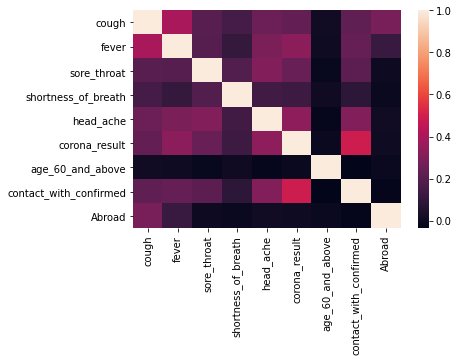

In [20]:
import seaborn as sns
cor = df.corr()
sns.heatmap(cor)
plt.show()

# Observation : corona_result and contact_with_confirmed seem highly corelated

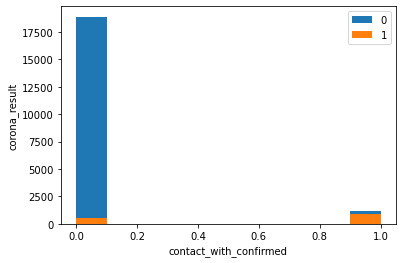

In [21]:
df.groupby('contact_with_confirmed')['corona_result'].plot.hist(legend = True)
plt.xlabel('contact_with_confirmed')
plt.ylabel('corona_result')
plt.show()

# Observation : A person who comes in contact with already suffering corona patient is more likely to catch the disease

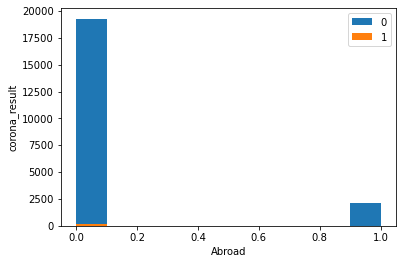

In [22]:
df.groupby('Abroad')['corona_result'].plot.hist(legend = True)
plt.xlabel('Abroad')
plt.ylabel('corona_result')
plt.show()

#### Chances of a person getting infected after having contact with confirmed corona patient :


In [23]:
no_of_patients = sum(df['contact_with_confirmed'] + df['corona_result'] == 2)
patients_claiming_contact = sum(df['contact_with_confirmed'] == 1)

print( ((no_of_patients) / patients_claiming_contact) * 100 )

63.33333333333333


## Importing required Libraries for making machine learning models :

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [25]:
X = df.drop(columns = ['corona_result'])
y = df['corona_result']

In [26]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Logistic Regression Model :

In [27]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
pred_y = log_reg.predict(test_x)

In [28]:
accuracy_score(test_y, pred_y)

0.9114776951672863

In [29]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3843
           1       0.72      0.29      0.41       461

    accuracy                           0.91      4304
   macro avg       0.82      0.64      0.68      4304
weighted avg       0.90      0.91      0.89      4304



In [39]:
# Observation : Accuracy --> 91 %
#             : Recall   --> 29 %

## SVM model :

In [36]:
svm_model = SVC(C = 0.1, kernel = 'rbf')
svm_model.fit(train_x, train_y)
pred_y = svm_model.predict(test_x)

In [37]:
accuracy_score(test_y, pred_y)

0.9198420074349443

In [38]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3843
           1       0.64      0.58      0.61       461

    accuracy                           0.92      4304
   macro avg       0.79      0.77      0.78      4304
weighted avg       0.92      0.92      0.92      4304



In [ ]:
# Observation : Accuracy --> 91 %
#             : Recall   --> 58 %

#### Final Result : Accuracy is almost same for both the models i.e. 91% but recall score is much better for svm i.e. 0.58